**Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy

**Neuron with Sigmoid Activation**

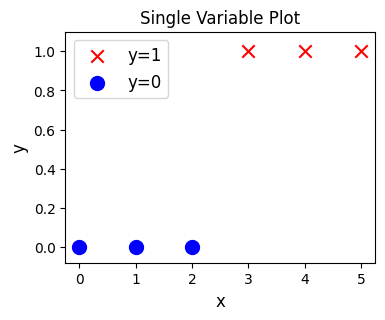

In [8]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

positives = Y_train == 1
negatives = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[positives], Y_train[positives], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[negatives], Y_train[negatives], marker='o', s=100, c = 'blue', label="y=0")

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('Single Variable Plot')
ax.legend(fontsize=12)
plt.show()

In [ ]:
model = Sequential([tf.keras.layers.Dense(1, input_dim = 1, activation = 'sigmoid', name = 'L1')])
model.summary()

c:\Users\tjawo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()

# set weights and biases to known values
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())


[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


: 

## Building a Neural Network ##
- normalize_data = tf.keras.layers.normaization(axis=-1) -> normalize_data.adapt(input) #learns mean and vaiance -> X_norm = normaize_data(X_original) 
<br><br>
- Sequential([layer1, layer2]) tells tensorflow to string layer 1 and layer 2 together to create a neural network
- **model.compile(loss = ,optimizer = )** defines a loss function and specifies a compile optimization
- **model.fit(X_train, Y_train, epochs)** runs gradient descent and fits the weights to the data
- **model.predict(x_new)** carries out inference using the compiled neural network


Dense Function
- **inputs:** activation from previous layer and parameters w, b for a the given layer
- **outputs:** activation from current layer

In [ ]:
# sample skeleton for a dense layer
def dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        w = W[:,j]
        z = np.fot(w, a_in) + b[j]
        a_out[j] = sigmoid(z)
    return a_out

In [ ]:
# sample skeleton for a MLP
def sequential(x):
    a1 = dense(x, W1 ,b1)
    a2 = dense(a1, W2, b2)
    a3 = dense(a2, W3, b3)
    a4 = dense(a3, W4, b4)
    f_x = a4

    return f_x

**Number Recognition NN**

In [ ]:
X, y = load_data() # we would actually load the 1000 training examples here, each a 20x20 grid unrolled into a 400-dimensional vector

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape = (400,))
        layers.Dense(25, activation = 'sigmoid'),
        layers.Dense(15, activation = 'sigmoid'),
        layers.Dense(1, activation = 'sigmoid')
    ], name = 'my_model'
)

In [ ]:
L1_num_params = 400 * 25 + 25 # W1 and b1 parameters
L2_num_params = 25 * 15 + 15   # W2 and b2 parameters
L3_num_params = 15 * 1 + 1     # W3 and b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizer.Adam(0.001)
)

model.fit(X, y, epochs = 20)

**Speed up matrix compute with vectorization**

In [ ]:

z = np.matmul(np.transpose(a_in), W) + b
a_out = sigmoid(z)

## Training a Neural Network

**General Model Training Steps:**
1. Specify how to compute the output given input (x) and parameters w, b (define model)
2. Specify loss and cost
3. Train on data to minimize the cost


**Neural Network Example:**
1. model = Sequential ([Dense(units= , activation= )], Dense(...), Dense(...))
2. model.compile(loss = BinaryCrossentropy)
3. model.fit(X, y, epochs=100)
<br>
- **cross entropy** is the same as logistic loss (L = -y*log(y_pred) - (1-y)*log(1-y_pred)), used for classification
- **mean squared error** used for regression

**Back Propogation**
- used to compute partial derivatives for gradient descent (model.fit(X, y, epochs))

## Other Activation Functions
**ReLU** - Rectified Linear Unit
- z < 0, g(z) = 0
- z >= 0, g(z) = z
<br>
<br>

**Linear** - "No Activation Function"
- a = g(z) = z


**Output Layer Activation Functions** - will usually have one fairly natural choice depending on what y is.
- **Sigmoid:** binary classification (output between zero and one)
- **Linear:** regression where values can be positive or negative
- **ReLU:** regression where values can only be positive values
<br>
<br>

**Hidden Layer Activation Functions** - ReLU is most common (more efficient, flat in only o one area of graph, making gradient descent faster)
- don't use linear activation function for hidden layers. if all layers were just linear activation functions, that would just be equivalent to linear regression



## Multiclass Classifciation

**Softmax Regression:** - a generaization of logistic regression
- P(y = 1 | x) = a1 = e^z1 / (e^z1 + e^z2 + ... e^zN)
- **Loss Function:** -log(a1) if y=1, -log(a2) if y=2, ...
- **Cost Function:**

**Digit Recognition 1-10** - 10 neurons in output layer using softmax, rather than 1 unit using sigmoid/logistic

**To Avoid Numerical Roundoff errors
- make output layer **linear** -> now outputs z1 - z10 rather than a1-a10
- model.compile(loss = **SparseCategoricalCrossentropy(from_logits=True)**) -> informs loss function that the softmax operation should be included in the loss calculation
- model.fit(X, Y, epichs = 100)
- logit = model(X)
- predictions = tf.nn.sigmoid(logits) to get actual probabilities

In [ ]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

p_preferred = preferred_model.predict(X_train)
sm_preferred = tf.nn.softmax(p_preferred).numpy()

**Example**

Text(0, 0.5, 'x1')

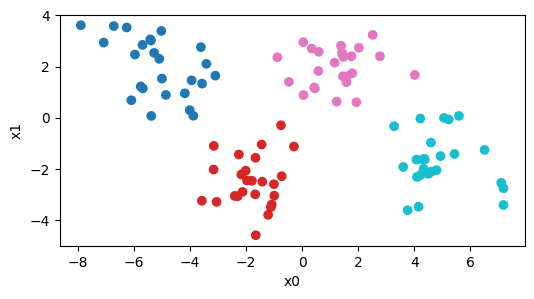

In [14]:
from sklearn.datasets import make_blobs
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples = m, centers = centers, cluster_std = std, random_state = 30)

fig, ax = plt.subplots(1, 1, figsize = (6,3))
ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'tab10')
ax.set_xlabel('x0')
ax.set_ylabel('x1')


In [19]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(2, activation = 'relu', name ='L1'),
        Dense(4, activation = 'linear', name = 'L2')
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4995  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4894 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4803 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4715 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4629 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4545 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4463 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4382 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4304 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4227 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4152 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4078 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4007 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3936 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3867 
Epoch 16/200
4/4 ━

## Multilabel Classification ##

- multiple binary classification problems in one NN -> can use sigmoid activation